___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Lab - 2 (CNN) <br><br>Assignment-2 Solution<br><br>Image Classification with CNN<br><h1>


# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [5]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

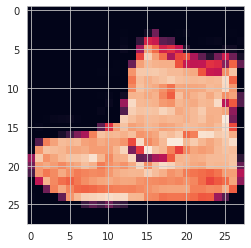

In [8]:
plt.imshow(X_train[0])

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
y_train[0]

9

In [11]:
classes[9]

'Ankle boot'

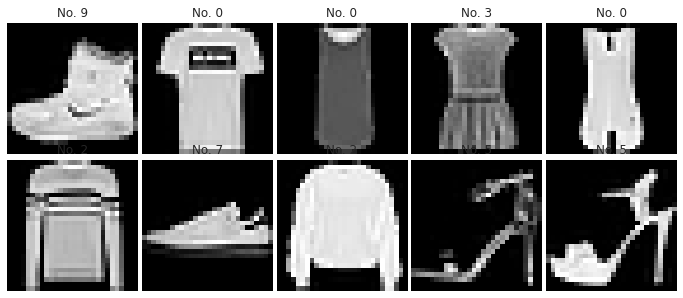

In [12]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [13]:
X_train.min()

0

In [14]:
X_train.max()

255

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train.min()

0.0

In [17]:
X_train.max()

1.0

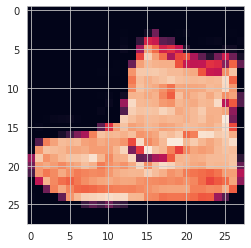

In [18]:
plt.imshow(X_train[0])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [21]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
y_train.shape

(60000,)

In [26]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [27]:
y_train[8]

5

In [28]:
Y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create The Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (3,3) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [30]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 256)               1211648   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [32]:
((3* 3 * 1) + 1) * 28

280

## Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [35]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 22s 5ms/step - loss: 0.4203 - accuracy: 0.8529 - val_loss: 0.3349 - val_accuracy: 0.8789
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3037 - accuracy: 0.8942 - val_loss: 0.2961 - val_accuracy: 0.8966
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2829 - accuracy: 0.9013 - val_loss: 0.2998 - val_accuracy: 0.8959
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2739 - accuracy: 0.9045 - val_loss: 0.3021 - val_accuracy: 0.8916
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2691 - accuracy: 0.9078 - val_loss: 0.3004 - val_accuracy: 0.8967


**TASK 7: Plot values of metrics you used in your model.**

In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.420,0.853,0.335,0.879
1,0.304,0.894,0.296,0.897
2,0.283,0.901,0.300,0.896
3,0.274,0.904,0.302,0.892
4,0.269,0.908,0.300,0.897


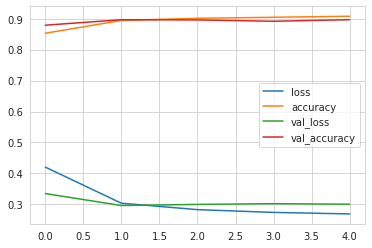

In [38]:
summary.plot();

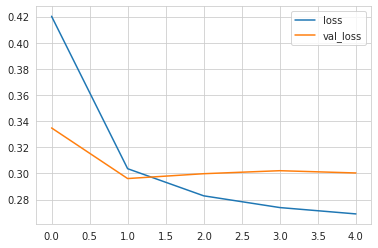

In [39]:
summary[["loss", "val_loss"]].plot();

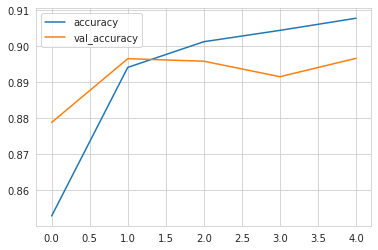

In [40]:
summary[["accuracy", "val_accuracy"]].plot();

In [41]:
model2 = Sequential()
model2.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model2.add(MaxPool2D(pool_size=(3, 3),strides=(1, 1)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [42]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16128)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2064512   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [43]:
model2.fit(X_train, Y_train, batch_size=32, epochs=15, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4749 - accuracy: 0.8388 - val_loss: 0.3215 - val_accuracy: 0.8829
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3338 - accuracy: 0.8855 - val_loss: 0.3122 - val_accuracy: 0.8912
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3190 - accuracy: 0.8906 - val_loss: 0.3068 - val_accuracy: 0.8936
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3136 - accuracy: 0.8936 - val_loss: 0.3071 - val_accuracy: 0.8969
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3077 - accuracy: 0.8951 - val_loss: 0.2987 - val_accuracy: 0.8990
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3086 - accuracy: 0.8953 - val_loss: 0.3044 - val_accuracy: 0.8972
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3070 - accuracy: 0.8963 - val_loss: 0.3294 - val_accuracy:

In [44]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.475,0.839,0.321,0.883
1,0.334,0.885,0.312,0.891
2,0.319,0.891,0.307,0.894
3,0.314,0.894,0.307,0.897
4,0.308,0.895,0.299,0.899


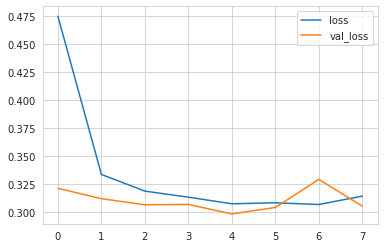

In [45]:
summary[["loss", "val_loss"]].plot();

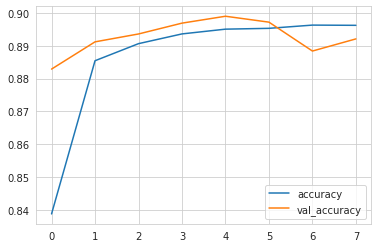

In [46]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2961 - accuracy: 0.8966


[0.2961166799068451, 0.8966000080108643]

In [68]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2987 - accuracy: 0.8990


[0.2986524701118469, 0.8989999890327454]

In [69]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2986524701118469
Test accuracy: 0.8989999890327454


In [70]:
pred_prob = model2.predict(X_test)
pred_prob

array([[1.1938159e-08, 5.6074628e-12, 1.7499234e-09, ..., 2.7578053e-04,
        2.3157299e-06, 9.9937326e-01],
       [4.0566155e-07, 1.4909252e-17, 9.9998391e-01, ..., 9.0366335e-20,
        5.0142550e-11, 9.2680980e-20],
       [4.2213447e-10, 1.0000000e+00, 6.2261889e-14, ..., 1.1266297e-18,
        1.1381283e-11, 1.3788673e-15],
       ...,
       [6.8312911e-09, 2.8485988e-19, 7.9644173e-11, ..., 1.3988547e-14,
        1.0000000e+00, 5.7642866e-13],
       [3.6019446e-07, 9.9992228e-01, 2.5847247e-09, ..., 1.3925024e-12,
        1.7533321e-08, 2.2158929e-10],
       [1.4479718e-03, 7.0077626e-06, 3.4843830e-03, ..., 1.8474244e-01,
        1.4818567e-02, 6.1237361e-02]], dtype=float32)

In [71]:
pred_prob.shape

(10000, 10)

In [72]:
pred_prob[0]

array([1.1938159e-08, 5.6074628e-12, 1.7499234e-09, 6.4685847e-11,
       1.0192792e-10, 3.4866980e-04, 1.3711493e-08, 2.7578053e-04,
       2.3157299e-06, 9.9937326e-01], dtype=float32)

In [73]:
np.argmax(pred_prob[0])

9

In [74]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [75]:
y_pred.shape

(10000,)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.87      0.83      1000
           3       0.87      0.93      0.90      1000
           4       0.84      0.83      0.84      1000
           5       0.97      0.99      0.98      1000
           6       0.76      0.66      0.71      1000
           7       0.96      0.94      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [77]:
print(confusion_matrix(y_test, y_pred))

[[859   0  18  26   5   1  88   0   3   0]
 [  1 966   2  20   5   0   4   0   2   0]
 [  9   0 872  11  59   0  49   0   0   0]
 [ 10   2  13 934  13   0  28   0   0   0]
 [  0   2  86  45 833   0  33   0   1   0]
 [  0   0   0   0   0 987   0  11   0   2]
 [117   1 107  37  75   0 660   0   3   0]
 [  0   0   0   0   0  18   0 940   1  41]
 [  1   3   2   3   5   2   9   4 970   1]
 [  0   0   0   0   0   5   1  25   0 969]]


In [78]:
(y_test != y_pred).sum()

1010

## Prediction

In [81]:
samples=[X_test[5], X_test[10], X_test[15]]

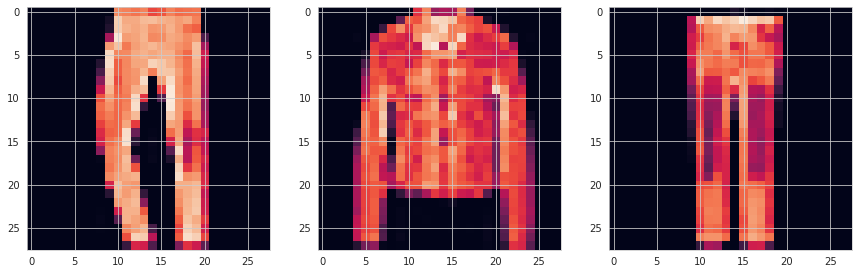

In [82]:
plt.figure(figsize = (20,5))
index=1
for i in samples:
    plt.subplot(1,4,index)
    plt.imshow(i.reshape(28,28))
    index += 1

In [83]:
samples = np.array(samples)
samples

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [84]:
samples.shape

(3, 28, 28, 1)

In [86]:
pred_prob = model2.predict(samples)
pred_prob

array([[5.4094516e-09, 1.0000000e+00, 1.8689724e-12, 5.6003147e-10,
        5.3301533e-11, 8.4802967e-14, 4.1159667e-10, 7.7406098e-18,
        2.8695959e-10, 2.1924496e-14],
       [5.1771208e-06, 7.3738583e-08, 3.1232504e-02, 1.2938939e-06,
        9.6278566e-01, 2.7621841e-10, 5.9739542e-03, 6.2993677e-12,
        1.3434776e-06, 1.1335857e-09],
       [7.2169491e-06, 9.9857879e-01, 1.1824451e-07, 1.3631774e-03,
        4.0940333e-05, 1.0134389e-09, 9.6432095e-06, 1.7654572e-11,
        1.6374517e-07, 3.9905466e-09]], dtype=float32)

In [87]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([1, 4, 1])

In [91]:
y_test[5:16:5]

array([1, 4, 1], dtype=uint8)

In [96]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [97]:
for i in y_test[5:16:5]:
    print(classes[i])

Trouser
Coat
Trouser


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___